In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import sklearn
import os as os
import statsmodels.formula.api as smf

In [2]:
mlb_data=pd.read_csv("MLB Attendance.csv",encoding = "utf-8")

In [3]:
cc_mlb_data = mlb_data[(mlb_data.home_team == "Chicago Cubs")]

In [4]:
#Cubs capacity = 41,009
cc_mlb_data['pct_full'] = (cc_mlb_data['attend']/41009)*100

<ipython-input-4-a99e5982ca36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_mlb_data['pct_full'] = (cc_mlb_data['attend']/41009)*100


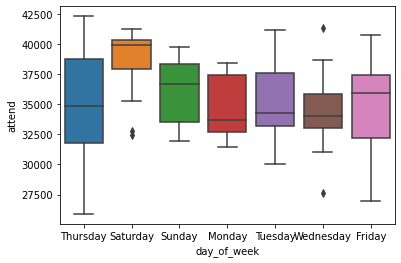

In [5]:
#boxplot
boxplot = sns.boxplot(x="day_of_week", y="attend", data=cc_mlb_data)
boxplot
plt.savefig("figure.png", bbox_inches = "tight")

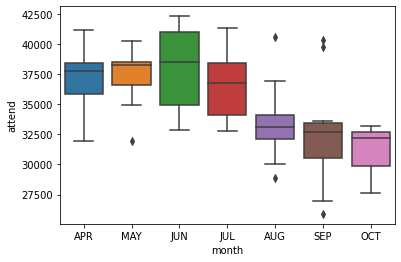

In [6]:
boxplot = sns.boxplot(x="month", y="attend", data=cc_mlb_data)
boxplot
plt.savefig("figure.png", bbox_inches = "tight")

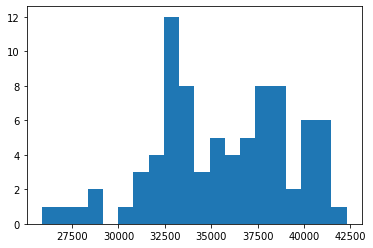

In [7]:
#histogram
plt.hist(cc_mlb_data["attend"], bins = 20)
plt.show()

In [8]:
#promotion counts
pd.crosstab(index=cc_mlb_data['bobblehead'], columns='count')

col_0,count
bobblehead,
NO,77
YES,4


In [9]:
pd.crosstab(index=cc_mlb_data['shirt'], columns='count')

col_0,count
shirt,
NO,76
YES,5


In [10]:
pd.crosstab(index=cc_mlb_data['cap'], columns='count')

col_0,count
cap,
NO,75
YES,6


In [11]:
pd.crosstab(index=cc_mlb_data['fireworks'], columns='count')

col_0,count
fireworks,
NO,81


In [12]:
#model
est = smf.ols('attend ~ day_of_week + month + bobblehead + cap + shirt',cc_mlb_data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     5.325
Date:                Wed, 19 May 2021   Prob (F-statistic):           8.68e-07
Time:                        10:44:33   Log-Likelihood:                -747.55
No. Observations:                  81   AIC:                             1527.
Df Residuals:                      65   BIC:                             1565.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.617e+04   1116.284     32.401      0.000    3.39e+04    3.84e+04
day_of_week[T.Monday]      703.1828   1263.360      0.557      0.580   -1819.920    3226.286
day_of_week[T.Saturday]   3553.1097   1106.573      3.211      0.002    1343.130    5763.089
day_of_week[T.Sunday]     1757.3207   1119.111      1.570      0.121    -477.698    3992.339
day_of_week[T.Thursday]   -149.3167   1271.121     -0.117      0.907   -2687.920    2389.287
day_of_week[T.Tuesday]     347.3297   1157.082      0.300      0.765   -1963.523    2658.182
day_of_week[T.Wednesday]  -192.8322   1125.732     -0.171      0.865   -2441.075    2055.411
month[T.AUG]             -3495.2949   1056.140     -3.309      0.002   -5604.552   -1386.038
month[T.JUL]              -847.6871   1119.356     -0.757      0.452   -3083.195    1387.821
month[T.JUN]              1154.2281   1153.098      1.001      0.321   -1148.667    3457.123
month[T.MAY]               783.9829   1095.091      0.716      0.477   -1403.065    2971.031
month[T.OCT]             -5474.6054   1810.108     -3.024      0.004   -9089.641   -1859.570
month[T.SEP]             -5121.7669   1125.947     -4.549      0.000   -7370.437   -2873.096
bobblehead[T.YES]        -3199.2359   1559.147     -2.052      0.044   -6313.067     -85.405
cap[T.YES]                 341.8228   1286.057      0.266      0.791   -2226.611    2910.256
shirt[T.YES]              1517.0042   1308.201      1.160      0.250   -1095.653    4129.661
==============================================================================
Omnibus:                        2.494   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.811
Skew:                           0.325   Prob(JB):                        0.404
Kurtosis:                       3.338   Cond. No.                         9.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None 

cc_mlb_data['yhat'] = pred #predicted values
cc_mlb_data['resid'] = resid #residual values

<ipython-input-14-c6f7c67c0eb8>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


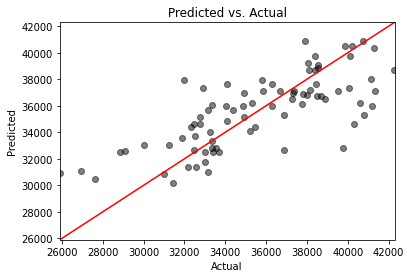

In [14]:
#plot the actual and predicted
#add a line
lineStart = cc_mlb_data.attend.min() 
lineEnd = cc_mlb_data.attend.max()
plt.figure()
plt.scatter(cc_mlb_data['attend'],cc_mlb_data['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

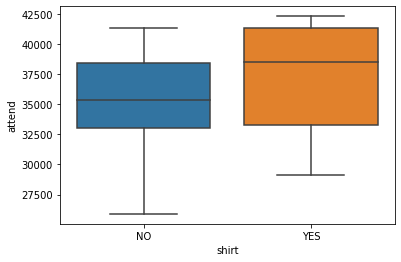

In [15]:
boxplot = sns.boxplot(x="shirt", y="attend", data=cc_mlb_data)
boxplot
plt.savefig("figure.png", bbox_inches = "tight")

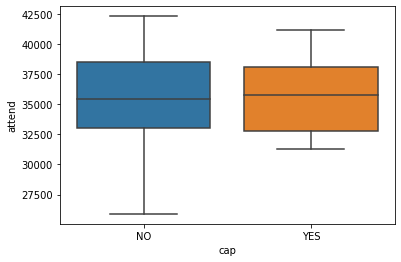

In [16]:
boxplot = sns.boxplot(x="cap", y="attend", data=cc_mlb_data)
boxplot
plt.savefig("figure.png", bbox_inches = "tight")